## 🌳 Hierarchical Clustering Implementation

### 🧩 Problem Statement
The goal of this project is to perform unsupervised clustering on the **Iris Dataset** using Hierarchical Clustering techniques. We aim to group different species of flowers based on their sepal and petal measurements without using predefined labels.

---

### 📊 Dataset Features
- **Sepal Length**
- **Sepal Width**
- **Petal Length**
- **Petal Width**

---

### 🛠️ Key Steps Performed
1. **Data Loading**: Importing the Iris dataset using `sklearn.datasets`.
2. **Dendrogram Analysis**: Using `scipy.cluster.hierarchy` to plot a Dendrogram and determine the optimal number of clusters.

3. **Agglomerative Clustering**: Implementing the `AgglomerativeClustering` model from Scikit-Learn.
4. **Distance Metric**: Using **Euclidean Distance** to measure similarity between points.
5. **Linkage Method**: Applying **Ward's Linkage** to minimize the variance within clusters.

---

### 📈 Results & Visualization
- Visualizing clusters to see how well the algorithm separates the three species of Iris.
- Identifying the "cut-off" point in the dendrogram to define the clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
## Import IRIS dataset
iris=datasets.load_iris()

In [4]:
iris_data=pd.DataFrame(iris.data)

In [7]:
iris_data.columns=iris.feature_names

In [8]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
x_scaled=scaler.fit_transform(iris_data)

In [11]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [12]:
## Apply the PCA and Reduce the dimensionality Reduction 
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(x_scaled)

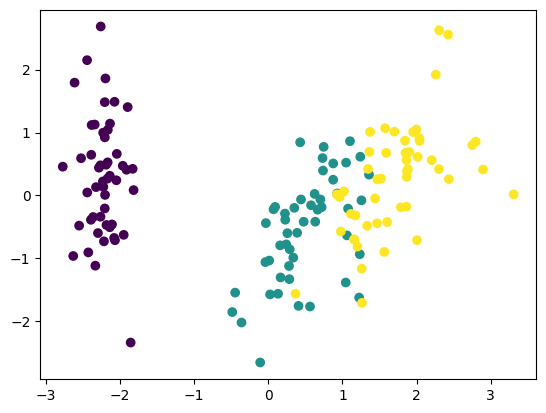

In [17]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

Text(0, 0.5, 'Eucledian DIstance')

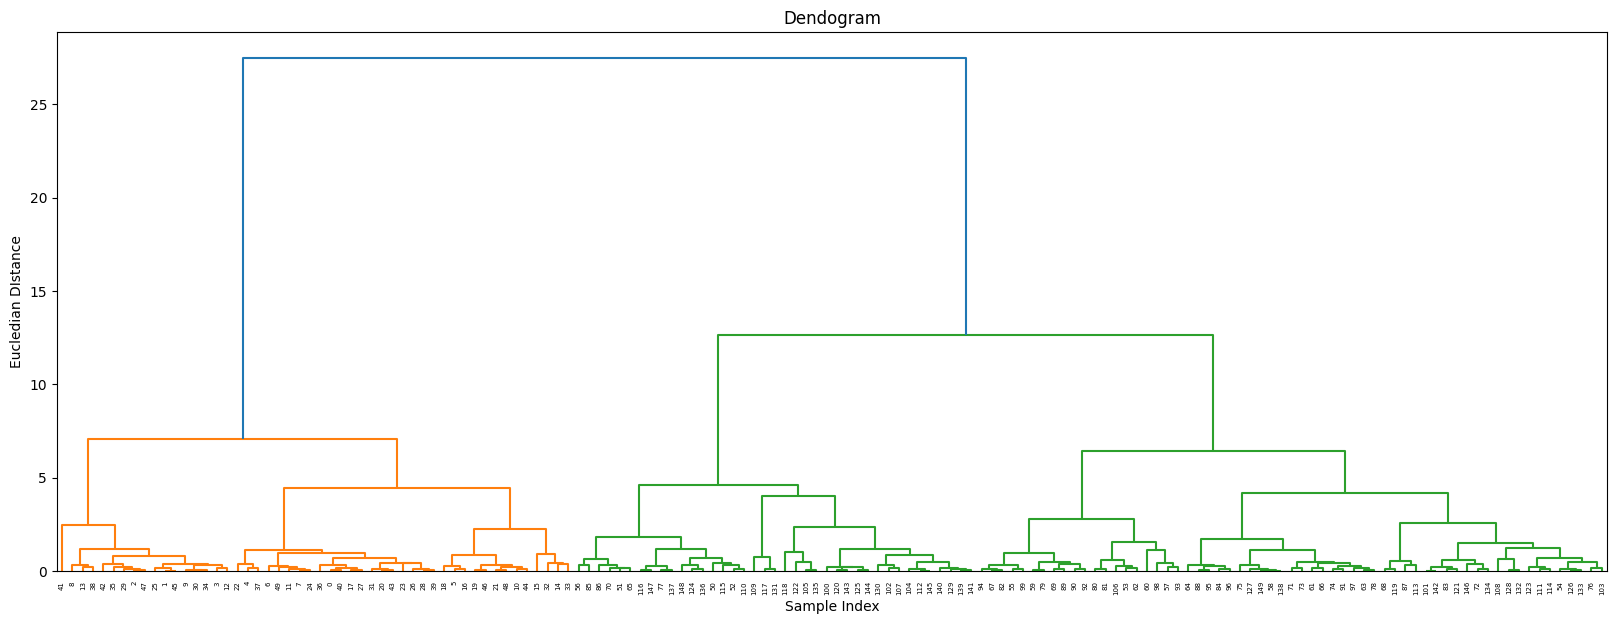

In [20]:
## Apply Agglomerative Clustring 
# to construct a dendogram 

import scipy.cluster.hierarchy as sc
## Plot the dendogram 
plt.figure(figsize=(20,7))
plt.title('Dendograms')

## Create dendogram 
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian DIstance')

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(pca_scaled)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [28]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

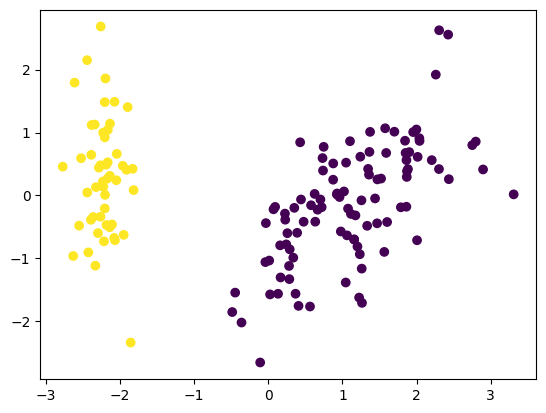

In [30]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)